# Linear Regression via Gradient Descent — From Mathematics to Machine Learning

**Objective:**  
To implement **Linear Regression** using **Batch Gradient Descent** from scratch (without sklearn)  
and visualize how parameters \( w, b \) converge to minimize the loss function.

---

### Mathematical Formulation

Given data \( (x_i, y_i) \), the goal is to minimize:

\[
J(w, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))^2
\]

Gradient updates are:

\[
\begin{aligned}
w &:= w - \eta \frac{\partial J}{\partial w} = w - \eta \left( -\frac{2}{N}\sum x_i(y_i - (wx_i + b)) \right) \\
b &:= b - \eta \frac{\partial J}{\partial b} = b - \eta \left( -\frac{2}{N}\sum (y_i - (wx_i + b)) \right)
\end{aligned}
\]

---

### Conceptual Link to Optimization

- Gradient Descent here acts on **parameters** (weights), not variables.  
- The loss surface is a convex paraboloid — similar to \( f(x,y) \) from the previous notebook.  
- Each update moves \( (w, b) \) downhill on the loss landscape until convergence.

---


Final w = 2.6383, Final b = 3.4296, Final Loss = 4.0520


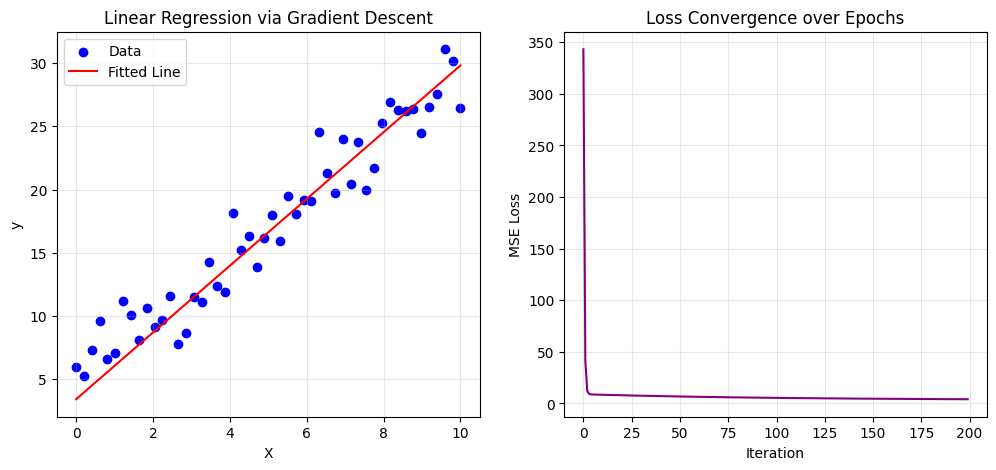

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear data
np.random.seed(42)
X = np.linspace(0, 10, 50)
true_w, true_b = 2.5, 5
y = true_w * X + true_b + np.random.randn(*X.shape) * 2.0  # noisy linear relation

# Initialize parameters
w, b = 0.0, 0.0
lr = 0.01  # learning rate
epochs = 200

# Containers for tracking
loss_history, w_history, b_history = [], [], []

# Gradient Descent Loop
for i in range(epochs):
    y_pred = w * X + b
    error = y - y_pred
    loss = np.mean(error ** 2)
    
    dw = -2 * np.mean(X * error)
    db = -2 * np.mean(error)
    
    w -= lr * dw
    b -= lr * db
    
    loss_history.append(loss)
    w_history.append(w)
    b_history.append(b)

# Final parameters
print(f"Final w = {w:.4f}, Final b = {b:.4f}, Final Loss = {loss:.4f}")

# --- Visualization ---
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Left plot — Data + Regression line
axs[0].scatter(X, y, color='blue', label='Data')
axs[0].plot(X, w * X + b, color='red', label='Fitted Line')
axs[0].set_title("Linear Regression via Gradient Descent")
axs[0].set_xlabel("X")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].grid(alpha=0.3)

# Right plot — Loss curve
axs[1].plot(range(epochs), loss_history, color='purple')
axs[1].set_title("Loss Convergence over Epochs")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("MSE Loss")
axs[1].grid(alpha=0.3)

plt.show()


---

### 🧩 Interpretation

- The red line fits the noisy blue data — parameters \( w, b \) converge close to the true values.
- The right plot shows the **loss function decreasing monotonically**, confirming correct optimization.
- The trajectory of \( (w, b) \) in parameter space mirrors the **contour descent** seen in your multivariate optimization plot.

---

### 🔗 Connection to Machine Learning

- Gradient Descent here acts on model weights \( w, b \).
- In Neural Networks, this principle scales to millions of parameters — each updated by **backpropagation** (chain rule extension of these gradients).
- Modern optimizers (Adam, RMSProp, AdaGrad) extend this with **adaptive learning rates**, **momentum**, and **second-order curvature approximations** (inspired by Newton’s method).

---

**Summary:**  
You have now fully bridged:
1. Pure Mathematics → Newton’s Method  
2. Optimization Theory → Gradient Descent  
3. Machine Learning → Model training dynamics
